In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

from flows.flows import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# BCE $C$ Parametrization

In [11]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/flows/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [13]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 0.6135596632957458 	 100	0.6134998798370361 	 100	0.6154569387435913 	 100	
1 0.6137897372245789 	 100	0.6143745183944702 	 100	0.6147382855415344 	 100	
2 0.61311274766922 	 100	0.6142220497131348 	 100	0.6143563985824585 	 100	
3 0.6133688688278198 	 100	0.6138599514961243 	 100	0.6138262152671814 	 100	
4 0.6136549115180969 	 100	0.6146882772445679 	 100	0.6145879030227661 	 100	
5 0.6132753491401672 	 100	0.6136282682418823 	 100	0.6145490407943726 	 100	
6 0.6134077310562134 	 100	0.6135149598121643 	 100	0.6147461533546448 	 100	
7 0.6136646270751953 	 100	0.6133566498756409 	 100	0.6152427792549133 	 100	
8 0.6129323840141296 	 100	0.6136286854743958 	 100	0.6147916316986084 	 100	
9 0.6133783459663391 	 100	0.6133272051811218 	 100	0.6145686507225037 	 100	
10 0.613294243812561 	 100	0.613235354423523 	 100	0.6143259406089783 	 100	
11 0.6141030192375183 	 100	0.6129085421562195 	 100	0.6145983934402466 	 100	
12 0.6141424179077148 	 100	0.6135497093200684 	 100	0.61466413736

# MSE $C$ Parametrization

In [14]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/flows/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [15]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 0.2139073759317398 	 100	0.2141829878091812 	 100	0.21404290199279785 	 100	
1 0.2136995494365692 	 100	0.21399156749248505 	 100	0.21402409672737122 	 100	
2 0.21394039690494537 	 100	0.21383507549762726 	 100	0.2140907496213913 	 100	
3 0.2142161875963211 	 100	0.21392668783664703 	 100	0.21421325206756592 	 100	
4 0.2141457200050354 	 100	0.21414437890052795 	 100	0.2139241099357605 	 100	
5 0.21392115950584412 	 100	0.2141987383365631 	 100	0.2143034040927887 	 100	
6 0.2138678878545761 	 100	0.21439948678016663 	 100	0.21439228951931 	 100	
7 0.2141367495059967 	 100	0.21423940360546112 	 100	0.21419934928417206 	 100	
8 0.2140088677406311 	 96	0.21401050686836243 	 100	0.21393239498138428 	 100	
9 0.21376068890094757 	 100	0.21389102935791016 	 100	0.214279904961586 	 100	
10 0.21413186192512512 	 100	0.2140643149614334 	 100	0.21414272487163544 	 100	
11 0.2138526290655136 	 100	0.214345782995224 	 100	0.21403804421424866 	 100	
12 0.21397727727890015 	 100	0.21405190229415894

# MLC $C$ Parametrization

In [16]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/flows/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [17]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 -0.13604561984539032 	 100	-0.11521941423416138 	 100	-0.20942437648773193 	 79	
1 -0.14385710656642914 	 100	-0.10743831098079681 	 100	nan 	 85	
2 -0.16936638951301575 	 100	-0.14177453517913818 	 100	-0.19868707656860352 	 56	
3 -0.11812916398048401 	 100	-0.10362108796834946 	 100	nan 	 89	
4 -0.105319544672966 	 100	-0.10645885020494461 	 100	-0.21466444432735443 	 86	
5 -0.11482161283493042 	 100	-0.11460504680871964 	 100	-0.21253129839897156 	 82	
6 -0.12384726107120514 	 100	-0.12887127697467804 	 100	nan 	 95	
7 -0.12204910814762115 	 100	-0.11877432465553284 	 100	-0.18805336952209473 	 63	
8 -0.12582780420780182 	 100	-0.14920486509799957 	 100	-0.22527265548706055 	 83	
9 -0.11761670559644699 	 100	-0.14108197391033173 	 100	-0.1843865066766739 	 55	
10 -0.13326507806777954 	 100	-0.13218072056770325 	 100	-0.19289343059062958 	 78	
11 -0.1209031417965889 	 100	-0.11254226416349411 	 100	nan 	 77	
12 -0.13885584473609924 	 100	-0.10793232917785645 	 100	-0.19597615301609

# SQR $C$ Parametrization

In [18]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/flows/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [19]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 0.9727969765663147 	 100	1.1453828811645508 	 65	0.9148647785186768 	 100	
1 0.9785235524177551 	 100	1.2218544483184814 	 100	0.9155407547950745 	 100	
2 0.9743910431861877 	 100	17.52957534790039 	 18	0.9148786664009094 	 100	
3 0.9864885210990906 	 100	1.2884525060653687 	 25	0.9143615365028381 	 100	
4 0.9578568339347839 	 100	1.4093098640441895 	 69	0.9139790534973145 	 100	
5 0.9667890071868896 	 100	1.9674628973007202 	 21	0.9142982363700867 	 100	
6 0.9521061182022095 	 100	0.9828982949256897 	 100	0.9141726493835449 	 100	
7 0.9590039253234863 	 100	1.5066394805908203 	 37	0.9147028923034668 	 100	
8 0.9811533689498901 	 100	1.256949543952942 	 42	0.9140576124191284 	 100	
9 0.981311559677124 	 100	4.853180408477783 	 34	0.9143707752227783 	 100	
10 0.9548529982566833 	 100	22.428926467895508 	 12	0.9141653776168823 	 100	
11 0.9791586399078369 	 100	23.588804244995117 	 14	0.9135320782661438 	 100	
12 0.9601330757141113 	 100	1.554908275604248 	 29	0.914269208908081 	 100	


# MAEs

In [20]:
d = 4

dat_target = make_target(d)
sim_target = make_target(d)

dat_ckpt = tf.train.Checkpoint(dat_target)
sim_ckpt = tf.train.Checkpoint(sim_target)

dat_ckpt.restore('flows/dat/ckpt-79')
sim_ckpt.restore('flows/sim/ckpt-79')

In [103]:
lr = lambda x: tf.math.exp(dat_target.log_prob(x) - sim_target.log_prob(x)).numpy()

In [112]:
X_mae = np.load('data/zenodo/X_tst.npy')
#lr_tst = lr(X_mae)
#np.save('data/zenodo/lr_tst_1000.npy', lr_tst)
lr_tst = np.load('data/zenodo/lr_tst.npy')
lr_tst[lr_tst > 1e7] = 1e7

def mae(model_lr):
    return np.abs(model_lr(X_mae) - lr_tst).mean()

## BCE

In [113]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/flows/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [114]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1_2.npy', avg_1)
np.save(filestr + 'avg_2_2.npy', avg_2)
np.save(filestr + 'avg_3_2.npy', avg_3)

print(avg_1, avg_2, avg_3)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:168: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze(f / (1. - f))
/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:225: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze(t_tanh(f) / (1. - t_tanh(f)))


inf inf 16211.644


## MSE

In [115]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/flows/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

# True distribution information
# from above

In [116]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1_2.npy', avg_1)
np.save(filestr + 'avg_2_2.npy', avg_2)
np.save(filestr + 'avg_3_2.npy', avg_3)

print(avg_1, avg_2, avg_3)

inf inf 16211.696


## MLC

In [117]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/flows/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [118]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1_2.npy', avg_1)
np.save(filestr + 'avg_2_2.npy', avg_2)
np.save(filestr + 'avg_3_2.npy', avg_3)

avg_1, avg_2, avg_3

(16212.03, 16212.005, nan)

## SQR

In [119]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/flows/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [120]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3)

# Save results
np.save(filestr + 'avg_1_2.npy', avg_1)
np.save(filestr + 'avg_2_2.npy', avg_2)
np.save(filestr + 'avg_3_2.npy', avg_3)

avg_1, avg_2, avg_3

(16212.258, 16212.704, 18856.238)

## AB MSE

In [121]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/flows/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

ps = np.round(np.linspace(-2, 2, 101), 2)

In [122]:
# Get model likelihood ratios.
avgs = []
for p in ps:
    print(p, end = '\t')
    lrs = [None] * reps
    params = {'loss':get_mse(p), 'd': 4}
    for i in range(reps):
        model = create_model(**params)
        model.load_weights(mse_filestr.format(p, i))
        lrs[i] = pow_odds_lr(model, p, m, s)
    
    maes = [mae(lr) for lr in lrs]
    avgs += [np.mean(maes)]

avgs = np.array(avgs)

-2.0	-1.96	-1.92	-1.88	-1.84	-1.8	-1.76	-1.72	-1.68	-1.64	-1.6	-1.56	-1.52	-1.48	-1.44	-1.4	-1.36	-1.32	-1.28	-1.24	-1.2	-1.16	-1.12	-1.08	-1.04	-1.0	-0.96	-0.92	-0.88	-0.84	-0.8	-0.76	-0.72	-0.68	-0.64	-0.6	-0.56	-0.52	-0.48	-0.44	-0.4	-0.36	-0.32	-0.28	-0.24	-0.2	-0.16	-0.12	-0.08	-0.04	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:216: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze( (f / (1. - f))**(p - 1))


0.0	0.04	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:216: RuntimeWarning: divide by zero encountered in power
  return np.squeeze( (f / (1. - f))**(p - 1))


0.08	0.12	0.16	0.2	0.24	0.28	0.32	0.36	0.4	0.44	0.48	0.52	0.56	0.6	0.64	0.68	0.72	0.76	0.8	0.84	0.88	0.92	0.96	1.0	1.04	1.08	1.12	1.16	1.2	1.24	1.28	1.32	1.36	1.4	1.44	1.48	1.52	1.56	1.6	1.64	1.68	1.72	1.76	1.8	1.84	1.88	1.92	1.96	2.0	

In [123]:
# Save results
np.save(filestr + 'avgs_2', avgs)

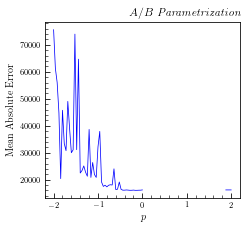

In [124]:
w = 3.5
h = 3.25              # Plots have dimension (w,h)

plt.figure(figsize = (w, h))

plt.plot(ps, avgs, c='blue', lw = 0.75)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')
#plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_mse_zenodo_2.png', 
            dpi=300, 
            bbox_inches='tight')

## AB SQR

In [125]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/flows/ab_sqr/set_{}/'.format(num)
lin_filestr = filestr + 'relu/model_{}_{}.h5'
exp_filestr = filestr + 'exponential/model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

rs = np.sort(np.append(np.round(np.linspace(-2, 2, 81), 2),
                       np.round(np.linspace(-0.05, 0.05, 26), 3)[1:-1]))

In [126]:
lin_avgs = []
exp_avgs = []

for r in rs:
    print(r, end = '\t')
    lin_lrs = [None] * reps
    exp_lrs = [None] * reps
    lin_params = {'loss': get_sqr(r), 'd': 4, 'output':'relu'}
    exp_params = {'loss': get_exp_sqr(r), 'd': 4, 'output':'linear'}
    
    for i in range(reps):
        lin_model = create_model(**lin_params)
        exp_model = create_model(**exp_params)
        
        lin_model.load_weights(lin_filestr.format(r, i))
        exp_model.load_weights(exp_filestr.format(r, i))
        
        lin_lrs[i] = pow_lr(lin_model, r, m, s)
        exp_lrs[i] = pow_exp_lr(exp_model, r, m, s)
    
    lin_maes = [mae(lr) for lr in lin_lrs]
    exp_maes = [mae(lr) for lr in exp_lrs]
    
    lin_avgs += [np.mean(lin_maes)]
    exp_avgs += [np.mean(exp_maes)]

-2.0	-1.95	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:204: RuntimeWarning: divide by zero encountered in power
  return np.squeeze(f**p)


-1.9	-1.85	-1.8	-1.75	-1.7	-1.65	-1.6	-1.55	-1.5	-1.45	-1.4	-1.35	-1.3	-1.25	-1.2	-1.15	-1.1	-1.05	-1.0	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:204: RuntimeWarning: divide by zero encountered in reciprocal
  return np.squeeze(f**p)


-0.95	-0.9	-0.85	-0.8	-0.75	-0.7	-0.65	-0.6	-0.55	-0.5	-0.45	-0.4	-0.35	-0.3	-0.25	-0.2	-0.15	-0.1	-0.05	-0.046	-0.042	-0.038	-0.034	-0.03	-0.026	-0.022	-0.018	-0.014	-0.01	-0.006	-0.002	0.0	0.002	0.006	0.01	0.014	0.018	0.022	0.026	0.03	0.034	0.038	0.042	0.046	0.05	0.1	0.15	0.2	0.25	0.3	0.35	0.4	0.45	0.5	0.55	0.6	0.65	0.7	0.75	0.8	0.85	0.9	0.95	1.0	1.05	1.1	1.15	1.2	1.25	1.3	1.35	1.4	1.45	1.5	1.55	1.6	1.65	1.7	1.75	1.8	1.85	1.9	1.95	2.0	

In [127]:
# Save results
lin_avgs = np.array(lin_avgs)
exp_avgs = np.array(exp_avgs)

np.save(filestr + 'lin_avgs_2', lin_avgs)
np.save(filestr + 'exp_avgs_2', exp_avgs)

In [128]:
lin_avgs = np.load(filestr + 'lin_avgs_2.npy')
exp_avgs = np.load(filestr + 'exp_avgs_2.npy')

rs[lin_avgs == min(lin_avgs)], rs[exp_avgs == min(exp_avgs)]

(array([-0.85]), array([-0.2]))

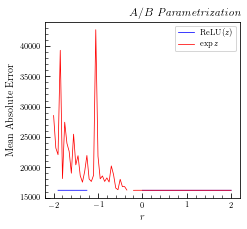

In [129]:
plt.figure(figsize = (w, h))

plt.plot(rs, lin_avgs, label=r'$\text{ReLU}(z)$', c='blue', lw = 0.75)
plt.plot(rs, exp_avgs, label=r'$\exp{z}$', c='red', lw = 0.75)
plt.legend()

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$r$')
#plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_sqr_zenodo_2.png', 
            dpi=300, 
            bbox_inches='tight')